<a href="https://colab.research.google.com/github/5ury4pr454th/fmml-labs/blob/master/Lab2_MLPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning terms and metrics

FMML Module 1, Lab 2<br>
 Module Coordinator: Thrupthi Ann John thrupthi.ann@research.iiit.ac.in <br>
 Release date: 11 October 2021 Monday <br>

 In this lab, we will show a part of the ML pipeline by extracting features, training and testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
# set randomseed
rng = np.random.default_rng(seed=42)

In this lab, we will use the California Housing dataset. There are 20640 samples, each with 8 attributes like income of the block, age of the houses per district etc. The task is to predict the cost of the houses per district. 

Let us download and examine the dataset. 

In [2]:
 dataset =  datasets.fetch_california_housing()
 # print(dataset.DESCR)  # uncomment this if you want to know more about this dataset
 # print(dataset.keys())  # if you want to know what else is there in this dataset
 dataset.target = dataset.target.astype(np.int) # so that we can classify
 print(dataset.data.shape)
 print(dataset.target.shape)

(20640, 8)
(20640,)


Here is a function for calculating the 1-nearest neighbours

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here 
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

def NN(traindata, trainlabel, testdata):
  # we will run nearest neighbour for each sample in the test data 
  # and collect the predicted classes in an array using list comprehension
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

# this algorithm finds one single query out of the training data out of all using the sum of squares of difference of features.
# then assigns that label.

We will also define a 'random classifier', which randomly allots labels to each sample

In [4]:
def RandomClassifier(traindata, trainlabel, testdata):
  # in reality, we don't need these arguments

  classes = np.unique(trainlabel)
  rints = rng.integers(low=0, high=len(classes), size=len(testdata))
  predlabel = classes[rints]
  return predlabel

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm. 

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

Let us make a function to split the dataset with the desired probability.

In [6]:
def split(data, label, percent):
  # generate a random number for each sample
  rnd = rng.random(len(label))
  split1 = rnd<percent
  split2 = rnd>=percent
  split1data = data[split1,:]
  split1label = label[split1]
  split2data = data[split2,:]
  split2label = label[split2]
  return split1data, split1label, split2data, split2label

We will reserve 20% of our dataset as the test set. We will not change this portion throughout our experiments

In [7]:
testdata, testlabel, alltraindata, alltrainlabel = split(dataset.data, dataset.target, 20/100)
print('Number of test samples = ', len(testlabel))
print('Number of other samples = ', len(alltrainlabel))
print('Percent of test data = ', len(testlabel)*100/len(dataset.target),'%')

Number of test samples =  4144
Number of other samples =  16496
Percent of test data =  20.07751937984496 %


## Experiments with splits

Let us reserve some of our train data as a validation set

In [8]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)

What is the accuracy of our classifiers on the train dataset?

In [9]:
trainpred = NN(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using nearest neighbour is ", trainAccuracy)

trainpred = RandomClassifier(traindata, trainlabel, traindata)
trainAccuracy = Accuracy(trainlabel, trainpred)
print("Train accuracy using random classifier is ", trainAccuracy)

Train accuracy using nearest neighbour is  1.0
Train accuracy using random classifier is  0.164375808538163


For nearest neighbour, the train accuracy is always 1. The accuracy of the random classifier is close to 1/(number of classes) which is 0.1666 in our case.

Let us predict the labels for our validation set and get the accuracy

In [10]:
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using nearest neighbour is ", valAccuracy)

valpred = RandomClassifier(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy using random classifier is ", valAccuracy)

Validation accuracy using nearest neighbour is  0.34108527131782945
Validation accuracy using random classifier is  0.1688468992248062


Validation accuracy of nearest neighbour is considerably less than its train accuracy while the validation accuracy of random classifier is the same. However, the validation accuracy of nearest neighbour is twice that of the random classifier. 

Now let us try another random split and check the validation accuracy

In [11]:
traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, 75/100)
valpred = NN(traindata, trainlabel, valdata)
valAccuracy = Accuracy(vallabel, valpred)
print("Validation accuracy of nearest neighbour is ", valAccuracy)

Validation accuracy of nearest neighbour is  0.34048257372654156


You can run the above cell multiple times to try with different random splits. 
We notice that the accuracy is different for each run, but close together. 

Now let us compare it with the accuracy we get on the test dataset. 

In [12]:
testpred = NN(alltraindata, alltrainlabel, testdata)
testAccuracy = Accuracy(testlabel, testpred)
print('Test accuracy is ', testAccuracy)

Test accuracy is  0.34917953667953666


### Try it out for yourself and answer:
1. How is the accuracy of the validation set affected if we increase the percentage of validation set? What happens when we reduce it?
2. How does the size of the train and validation set affect how well we can predict the accuracy on the test set using the validation set?
3. What do you think is a good percentage to reserve for the validation set so that thest two factors are balanced? 

Answer for both nearest neighbour and random classifier. You can note down the values for your experiments and plot a graph using  <a href=https://matplotlib.org/stable/gallery/lines_bars_and_markers/step_demo.html#sphx-glr-gallery-lines-bars-and-markers-step-demo-py>plt.plot<href>. Check also for extreme values for splits, like 99.9% or 0.1%

## Answer for Question 1

In [16]:
# Code for Question 1
val_acc_hist_NN = []
val_acc_hist_rand = []
test_acc_hist_NN = []
test_acc_hist_rand = []
validation_split_set = [0.05, 0.1, 1, 4, 9, 16, 32, 40, 50, 60, 70, 80, 85, 90, 92, 94, 99, 99.5, 99.9]

for i in validation_split_set:
  
  traindata, trainlabel, valdata, vallabel = split(alltraindata, alltrainlabel, i/100)
  
  # validation for NN
  valpredNN = NN(traindata, trainlabel, valdata)
  valAccuracyNN = Accuracy(vallabel, valpredNN)
  val_acc_hist_NN.append(valAccuracyNN)
  # validation for random classifier
  valpredrand = RandomClassifier(traindata, trainlabel, valdata)
  valAccuracyrand = Accuracy(vallabel, valpredrand)
  val_acc_hist_rand.append(valAccuracyrand)
  
  # test for NN
  test0predNN = NN(traindata, trainlabel, testdata)
  test0AccuracyNN = Accuracy(testlabel, test0predNN)
  test_acc_hist_NN.append(test0AccuracyNN)
  # test for random classifier
  test0predrand = RandomClassifier(traindata, trainlabel, testdata)
  test0Accuracyrand = Accuracy(testlabel, test0predrand)
  test_acc_hist_rand.append(test0Accuracyrand)

  print("Process completed for val_split = ", i)
  # print(f"Validation accuracy of nearest neighbour for {i}% validation is ", valAccuracy)

Process completed for val_split =  0.05
Process completed for val_split =  0.1
Process completed for val_split =  1
Process completed for val_split =  4
Process completed for val_split =  9
Process completed for val_split =  16
Process completed for val_split =  32
Process completed for val_split =  40
Process completed for val_split =  50
Process completed for val_split =  60
Process completed for val_split =  70
Process completed for val_split =  80
Process completed for val_split =  85
Process completed for val_split =  90
Process completed for val_split =  92
Process completed for val_split =  94
Process completed for val_split =  99
Process completed for val_split =  99.5
Process completed for val_split =  99.9


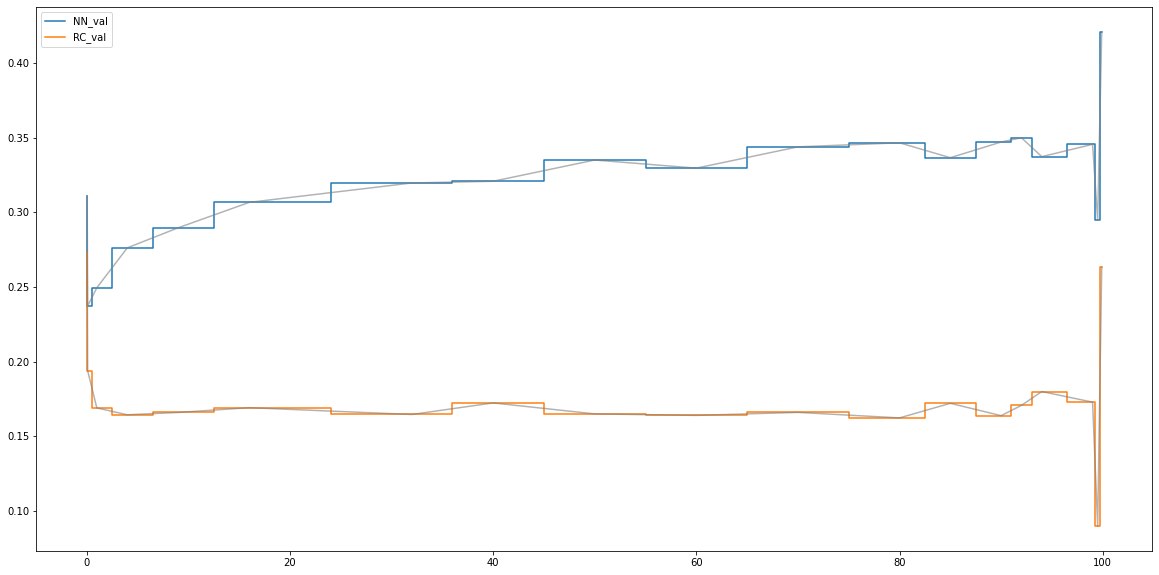

In [24]:
# Plot for question 1
plt.figure(figsize = (20, 10))
plt.step(validation_split_set, val_acc_hist_NN, where='mid', label = 'NN_val')
plt.plot(validation_split_set, val_acc_hist_NN, alpha = 0.6, color = 'grey')
plt.step(validation_split_set, val_acc_hist_rand, where='mid', label = 'RC_val')
plt.plot(validation_split_set, val_acc_hist_rand, alpha = 0.6, color = 'grey')
plt.legend()
plt.show()


### Answer for Question 1 continued...  (Explanation)
Now, note that the random classifier does not involve any logical prediction, but rather randomly assigns the labels. However, the NN classifier predicts with logic. Thus, the random classifer captures the effect of validation split alone. However, the NN classifer captures the effect of validation split on the training data, thus it shows how effectively the model predicts, along with how much data. 

Thus, the random classifier, on average predicts some wrong, some correct and thus gets an accuracy of around 0.166 (number of classes), when the validation split is between 4% and 99%. When the validation split is less than 1%, the **random classifier model hasn't seen all the labels**, due to lack of training data, from which it 'sees' the labels. However, the probability of finding the majority classes is very high in a very small sample. Thus, the random classifier learns only these labels, and labels the rest of the data with these majority labels. This is why the accuracy was very high for validation split less than 1%. When the validation split is more than 99%, the random classifier randomly assigns to very few samples in the validation split. Since the validation set is very small, **validation accuracy is very sensitive to correct and incorrect labels** and thus there are oscillations in the end of the curve.

For the NN classifier, the accuracy keeps increasing and then saturates around 70% to 80% split (as shown in the plot). The reason for the hike in accuracy for less than 1% split is because the model **has 'seen' the majority, and predicts all the other validation data as to be the closest to the majority class as the nearest neighbour**. For validation split more than 99%, the model shows rapid oscillations, again due to the fact that the model has learnt more and that the validation set is so small, that **the validation accuracy is sensitive to the correct and incorrect labels.**

## Answer for Question 2

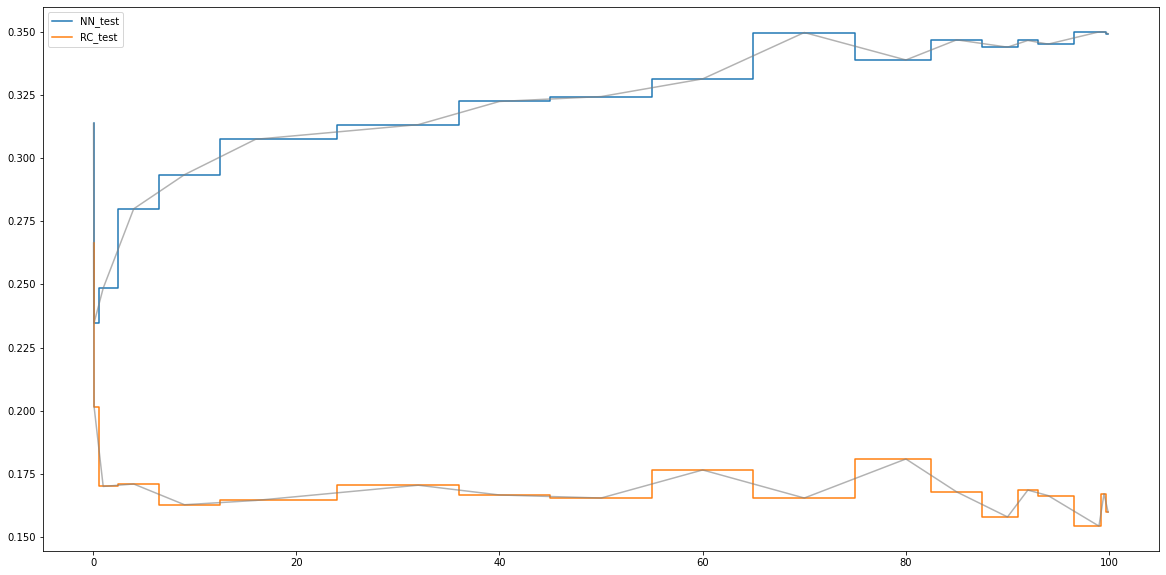

In [30]:
# Plot for question 2
plt.figure(figsize = (20, 10))
plt.step(validation_split_set, test_acc_hist_NN, where='mid', label = 'NN_test')
plt.plot(validation_split_set, test_acc_hist_NN, alpha = 0.6, color = 'grey')
plt.step(validation_split_set, test_acc_hist_rand, where='mid', label = 'RC_test')
plt.plot(validation_split_set, test_acc_hist_rand, alpha = 0.6, color = 'grey')
plt.legend()
plt.show()

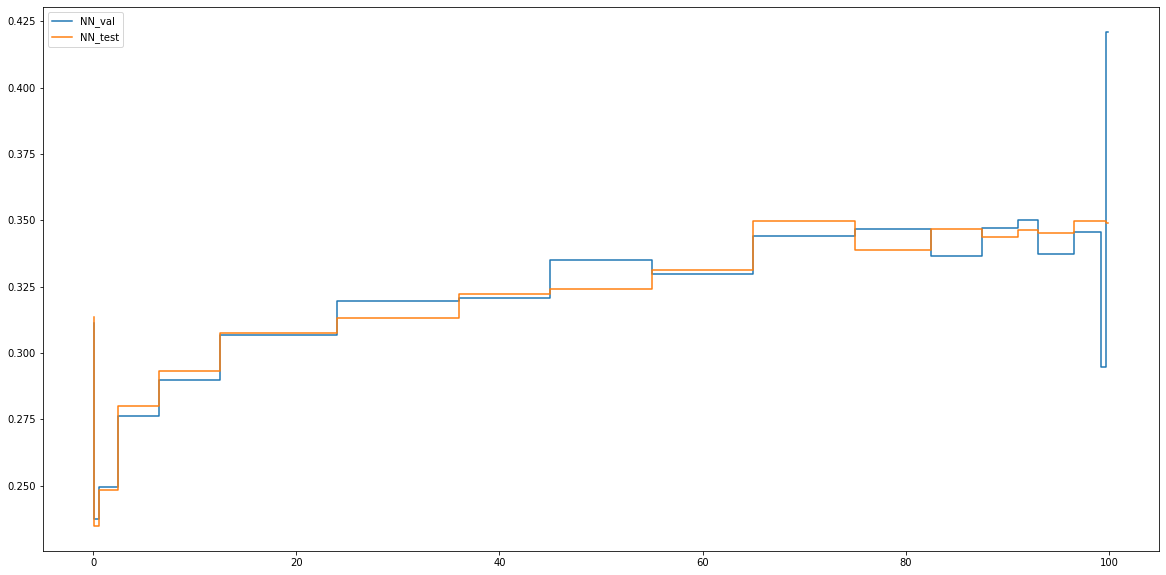

In [28]:
# Plot for question 2
plt.figure(figsize = (20, 10))
plt.step(validation_split_set, val_acc_hist_NN, where='mid', label = 'NN_val')
plt.step(validation_split_set, test_acc_hist_NN, where='mid', label = 'NN_test')
plt.legend()
plt.show()

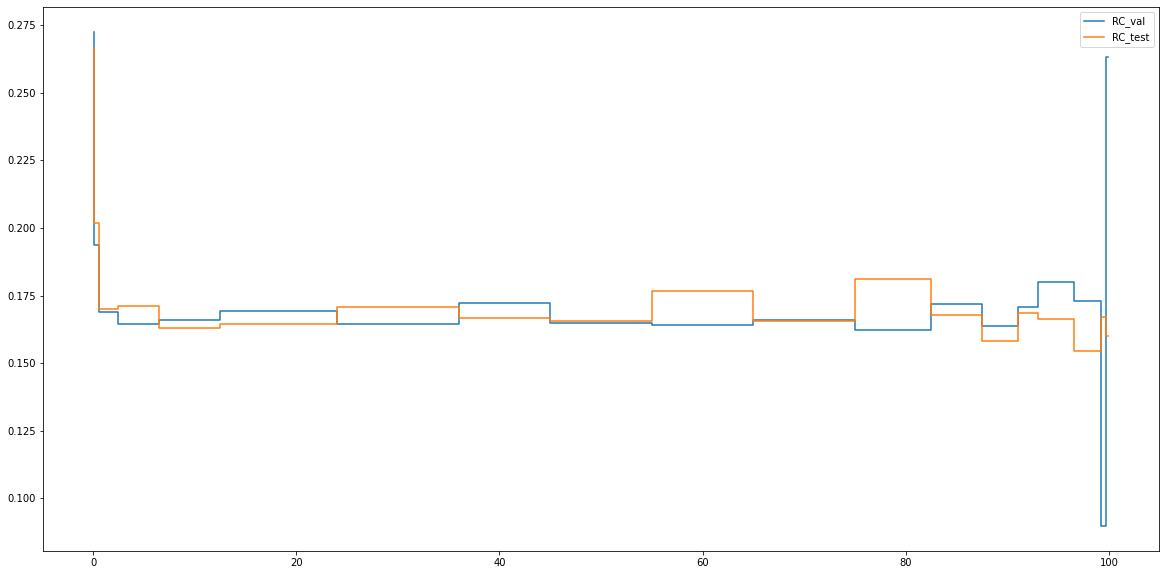

In [29]:
# Plot for question 2
plt.figure(figsize = (20, 10))
plt.step(validation_split_set, val_acc_hist_rand, where='mid', label = 'RC_val')
plt.step(validation_split_set, test_acc_hist_rand, where='mid', label = 'RC_test')
plt.legend()
plt.show()

From the first plot (validation accuracy vs validation split), it is clear that the 

## Multiple Splits

One way to get more accurate estimates for the test accuracy is by using <b>crossvalidation</b>. Here, we will try a simple version, where we do multiple train/val splits and take the average of validation accuracies as the test accuracy estimation. Here is a function for doing this. Note that this function will take a long time to execute. 

In [ ]:
# you can use this function for random classifier also
def AverageAccuracy(alldata, alllabel, splitpercent, iterations, classifier=NN):
  accuracy = 0
  for ii in range(iterations):
    traindata, trainlabel, valdata, vallabel = split(alldata, alllabel, splitpercent)
    valpred = classifier(traindata, trainlabel, valdata)
    accuracy += Accuracy(vallabel, valpred)
  return accuracy/iterations # average of all accuracies

In [ ]:
print('Average validation accuracy is ', AverageAccuracy(alltraindata, alltrainlabel, 75/100, 10, classifier=NN))
testpred = NN(alltraindata, alltrainlabel, testdata)
print('test accuracy is ',Accuracy(testlabel, testpred) )

Average validation accuracy is  0.3419153524214466
test accuracy is  0.3544973544973545


This is a very simple way of doing cross-validation. There are many well-known algorithms for cross-validation, like k-fold cross-validation, leave-one-out etc. This will be covered in detail in a later module. For more information about cross-validation, check <a href=https://en.wikipedia.org/wiki/Cross-validation_(statistics)>Cross-validatioin (Wikipedia)</a>

### Questions
1. Does averaging the validation accuracy across multiple splits give more consistent results?
2. Does it give more accurate estimate of test accuracy?
3. What is the effect of the number of iterations on the estimate? Do we get a better estimate with higher iterations?
4. Consider the results you got for the previous questions. Can we deal with a very small train dataset or validation dataset by increasing the iterations?
